In [1]:
#Choose the working directory as per your file system
import os
os.chdir("G:/Tejas/Project/Project_2")
os.getcwd()

'G:\\Tejas\\Project\\Project_2'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import pyplot
sns.set()
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn import svm
from sklearn.preprocessing import scale
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.decomposition import PCA
from sklearn.ensemble import GradientBoostingClassifier

In [3]:
loan_default = pd.read_csv("bank_loan.csv")
loan_default.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1.0
1,27,1,10,6,31,17.3,1.362202,4.000798,0.0
2,40,1,15,14,55,5.5,0.856075,2.168925,0.0
3,41,1,15,14,120,2.9,2.658720,0.821280,0.0
4,24,2,2,0,28,17.3,1.787436,3.056564,1.0


In [4]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   700 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 59.9 KB


In [5]:
loan_default.shape

(850, 9)

In [6]:
loan_default.describe()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
count,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,850.000000,700.000000
mean,35.029412,1.710588,8.565882,8.371765,46.675294,10.171647,1.576805,3.078789,0.261429
std,8.041432,0.927784,6.777884,6.895016,38.543054,6.719441,2.125840,3.398803,0.439727
min,20.000000,1.000000,0.000000,0.000000,13.000000,0.100000,0.011696,0.045584,0.000000
25%,29.000000,1.000000,3.000000,3.000000,24.000000,5.100000,0.382176,1.045942,0.000000
50%,34.000000,1.000000,7.000000,7.000000,35.000000,8.700000,0.885091,2.003243,0.000000
75%,41.000000,2.000000,13.000000,12.000000,55.750000,13.800000,1.898440,3.903001,1.000000
max,56.000000,5.000000,33.000000,34.000000,446.000000,41.300000,20.561310,35.197500,1.000000


In [7]:
#Find the total number of missing values in the dataframe
print("Missing values: ", loan_default.isnull().sum().values.sum(), "\n")

#Printing total number of unique values in the dataframe
print("Unique Values:\n", loan_default.nunique())

Missing values:  150 

Unique Values:
 age          37
ed            5
employ       33
address      32
income      129
debtinc     245
creddebt    842
othdebt     848
default       2
dtype: int64


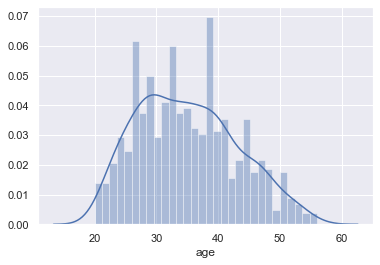

In [8]:
############ Univariate Analysis and Bivariate Analysis ##########################
# Analysis for single variable in the dataset and relation between 2 variables.
sns.distplot(loan_default["age"], kde = True , bins = 30)

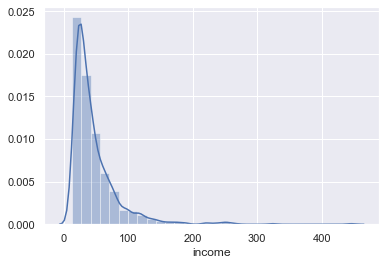

In [9]:
sns.distplot(loan_default["income"], kde = True , bins = 30)

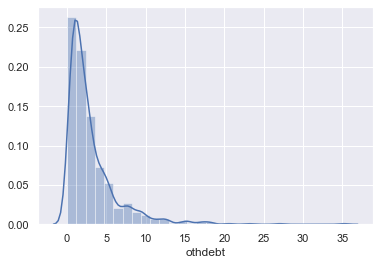

In [10]:
sns.distplot(loan_default["othdebt"], kde = True , bins = 30)

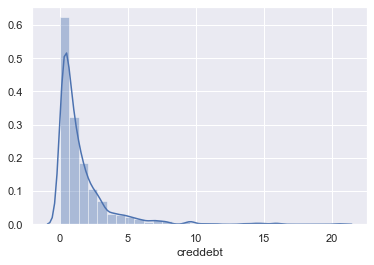

In [11]:
sns.distplot(loan_default["creddebt"], kde = True , bins = 30)

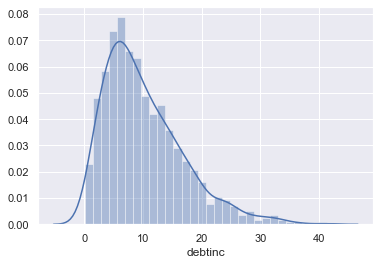

In [12]:
sns.distplot(loan_default["debtinc"], kde = True , bins = 30)

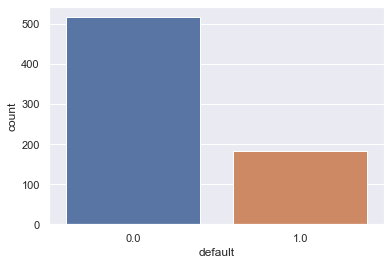

In [13]:
sns.countplot( x = "default" , data = loan_default)

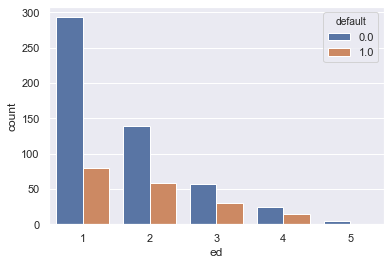

In [14]:
sns.countplot( x = "ed" , data = loan_default, hue = "default")

# Missing Value Analysis

In [15]:
loan_default.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [16]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(loan_default.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_Percentage'})

#Calculate percentage
missing_val['Missing_Percentage'] = (missing_val['Missing_Percentage']/len(loan_default))*100

#descending order
missing_val = missing_val.sort_values('Missing_Percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Perc_of_MV.csv", index = False)

In [17]:
missing_val.head(9)

,Variables,Missing_Percentage
0,default,17.647059
1,age,0.000000
2,ed,0.000000
3,employ,0.000000
4,address,0.000000
5,income,0.000000
6,debtinc,0.000000
7,creddebt,0.000000
8,othdebt,0.000000


In [18]:
default = loan_default[loan_default['default'].isnull()]
default.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
700,36,1,16,13,32,10.9,0.544128,2.943872,NaN
701,50,1,6,27,21,12.9,1.316574,1.392426,NaN
702,40,1,9,9,33,17.0,4.880700,0.729300,NaN
703,31,1,5,7,23,2.0,0.046000,0.414000,NaN
704,29,1,4,0,24,7.8,0.866736,1.005264,NaN


In [19]:
default.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
845,34,1,12,15,32,2.7,0.239328,0.624672,NaN
846,32,2,12,11,116,5.7,4.026708,2.585292,NaN
847,48,1,13,11,38,10.8,0.722304,3.381696,NaN
848,35,2,1,11,24,7.8,0.417456,1.454544,NaN
849,37,1,20,13,41,12.9,0.899130,4.389870,NaN


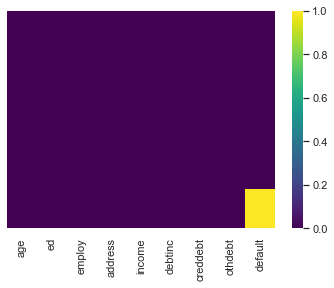

In [20]:
sns.heatmap(loan_default.isnull(), yticklabels = False, cmap = "viridis")

In [21]:
loan_default.isnull().sum()

age           0
ed            0
employ        0
address       0
income        0
debtinc       0
creddebt      0
othdebt       0
default     150
dtype: int64

In [22]:
loan_default.default = loan_default.default.fillna(2)

In [23]:
loan_default.default = loan_default.default.astype(np.int64)

In [24]:
loan_default.isnull().sum()

age         0
ed          0
employ      0
address     0
income      0
debtinc     0
creddebt    0
othdebt     0
default     0
dtype: int64

In [25]:
loan_default.head()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1


In [26]:
loan_default.tail()

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
845,34,1,12,15,32,2.7,0.239328,0.624672,2
846,32,2,12,11,116,5.7,4.026708,2.585292,2
847,48,1,13,11,38,10.8,0.722304,3.381696,2
848,35,2,1,11,24,7.8,0.417456,1.454544,2
849,37,1,20,13,41,12.9,0.899130,4.389870,2


# Outlier Analysis

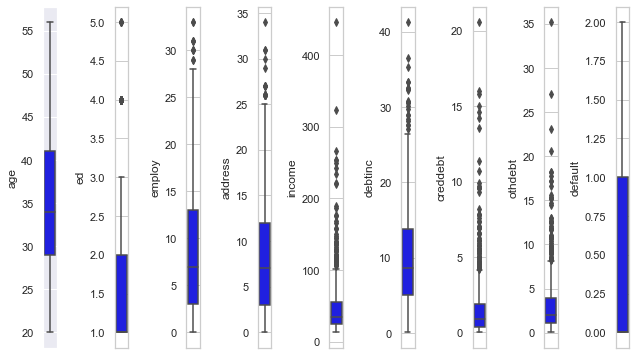

In [27]:
l = loan_default.columns.values
number_of_columns = 9
number_of_rows = len(l)-1/number_of_columns
plt.figure(figsize = (number_of_columns, 5*number_of_rows))
for i in range(0, len(l)):
    plt.subplot(number_of_rows + 1, number_of_columns, i+1)
    sns.set_style('whitegrid')
    sns.boxplot(loan_default[l[i]], color = 'blue', orient = 'v')
    plt.tight_layout()

In [28]:
loan_default.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       850 non-null    int64  
 1   ed        850 non-null    int64  
 2   employ    850 non-null    int64  
 3   address   850 non-null    int64  
 4   income    850 non-null    int64  
 5   debtinc   850 non-null    float64
 6   creddebt  850 non-null    float64
 7   othdebt   850 non-null    float64
 8   default   850 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 59.9 KB


# Preparing dataset for Machine Learning Algorithm

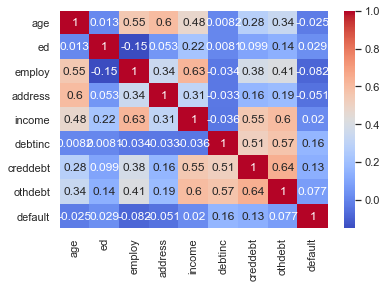

In [29]:
df1_cor = loan_default.corr()
sns.heatmap(df1_cor, annot = True, cmap = "coolwarm")

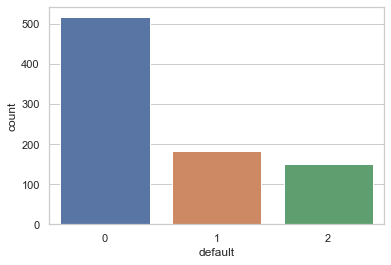

In [30]:
sns.countplot(loan_default.default)

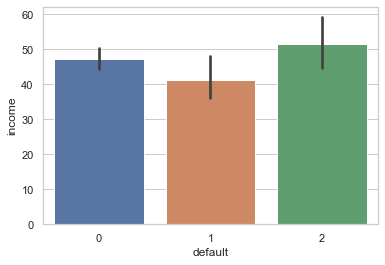

In [31]:
sns.barplot(x = "default", y = "income", data = loan_default)

In [32]:
#### selecting all missing values from dataset and we will predict those default case with best accurate 

train = loan_default.loc[loan_default['default'] != 2]
print(train.head())
print(train.tail())

   age  ed  employ  address  income  debtinc   creddebt   othdebt  default
0   41   3      17       12     176      9.3  11.359392  5.008608        1
1   27   1      10        6      31     17.3   1.362202  4.000798        0
2   40   1      15       14      55      5.5   0.856075  2.168925        0
3   41   1      15       14     120      2.9   2.658720  0.821280        0
4   24   2       2        0      28     17.3   1.787436  3.056564        1
     age  ed  employ  address  income  debtinc  creddebt   othdebt  default
695   36   2       6       15      27      4.6  0.262062  0.979938        1
696   29   2       6        4      21     11.5  0.369495  2.045505        0
697   33   1      15        3      32      7.6  0.491264  1.940736        0
698   45   1      19       22      77      8.4  2.302608  4.165392        0
699   37   1      12       14      44     14.7  2.994684  3.473316        0


In [33]:
train.default.unique()

array([1, 0], dtype=int64)

In [34]:
test = loan_default.loc[loan_default.default == 2]
test = test.iloc[:, 0:8]
print(test.head(2))
print(test.tail(2))

     age  ed  employ  address  income  debtinc  creddebt   othdebt
700   36   1      16       13      32     10.9  0.544128  2.943872
701   50   1       6       27      21     12.9  1.316574  1.392426
     age  ed  employ  address  income  debtinc  creddebt   othdebt
848   35   2       1       11      24      7.8  0.417456  1.454544
849   37   1      20       13      41     12.9  0.899130  4.389870


In [35]:
X = train[['age', 'ed', 'employ', 'address', 'income', 'debtinc', 'creddebt', 'othdebt']]
y = train['default']

We will seperate the data on the basis of dependent and independent variable and split it into train and test data

# Logistic Regression

In [36]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state = 42, test_size = 0.25)

In [37]:
clf_logis = LogisticRegression()

In [38]:
clf_logis.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [39]:
y_log_predict = clf_logis.predict(Xtest)

In [40]:
accuracy_score(ytest, y_log_predict)

0.8571428571428571

In [41]:
C_space = np.array([0.0001, 0.001, 0.1, 1])

In [42]:
param_grid = {'C' : C_space}

In [43]:
clf_logis_tuning = GridSearchCV(clf_logis, param_grid, cv=5)

In [44]:
clf_logis_tuning.fit(Xtrain, ytrain)

C:\Users\GIRI\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-04, 1.e-03, 1.e-01, 1.e+00])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [45]:
print("Tuned Logistic Regression Parameters: {}".format(clf_logis_tuning.best_params_)) 
print("Best score is {}".format(clf_logis_tuning.best_score_))

Tuned Logistic Regression Parameters: {'C': 0.1}
Best score is 0.7961904761904762


Using Logistic Regression, we achieved a training set accuracy of ~79% (in terms of training set accuracy alone.)

Next, the model will be fit with the best parameter of C and then it will be used to predict the test set.

In [46]:
clf_logis = LogisticRegression(C = 1.0)

In [47]:
clf_logis.fit(Xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [48]:
y_preds = clf_logis.predict(Xtest)

In [49]:
p_clf_logis_ba = clf_logis.predict_proba(Xtest)

In [50]:
accuracy_score(ytest, y_preds)

0.8571428571428571

In [51]:
print(classification_report(ytest, y_preds))

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       132
           1       0.76      0.60      0.68        43

    accuracy                           0.86       175
   macro avg       0.82      0.77      0.79       175
weighted avg       0.85      0.86      0.85       175



In [52]:
precision_lg, recall_lg, thresholds_lg = precision_recall_curve(ytest, p_clf_logis_ba[:, 1])

In [53]:
fpr_lg, tpr_lg, thresholds_lg = roc_curve(ytest, p_clf_logis_ba[:, 1])

In [54]:
#build confusion matrix

CM = pd.crosstab(ytest, y_preds)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(ytest, y_preds)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

print("Defaulted", sum(y_preds!=0))
print("Non-defaulted ", sum(y_preds==0))
CM

85.71428571428571
39.53488372093023
Defaulted 34
Non-defaulted  141


col_0,0,1
default,,
0,124,8
1,17,26


# Decision Tree

In [55]:
from sklearn.tree import DecisionTreeClassifier

In [56]:
clf_gini = DecisionTreeClassifier(criterion = 'gini', random_state = 10, max_depth = 5, min_samples_leaf = 7)
clf_gini.fit(Xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=7, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=10, splitter='best')

In [57]:
dt_predict = clf_gini.predict(Xtest)

In [58]:
dt_predict1 = clf_gini.predict_proba(Xtest)[:, 1]

In [59]:
accuracy_score(ytest, dt_predict)

0.7828571428571428

In [60]:
print(classification_report(ytest, dt_predict))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       132
           1       0.56      0.51      0.54        43

    accuracy                           0.78       175
   macro avg       0.70      0.69      0.70       175
weighted avg       0.78      0.78      0.78       175



In [61]:
precision_dc, recall_dc, thresholds_dc = precision_recall_curve(ytest, dt_predict1)

In [62]:
fpr_dc, tpr_dc, thresholds_dc = roc_curve(ytest, dt_predict1)

In [63]:
#build confusion matrix

CM = pd.crosstab(ytest, dt_predict)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(ytest, dt_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

print("Defaulted", sum(dt_predict!=0))
print("Non-defaulted ", sum(dt_predict==0))
CM

78.28571428571429
48.83720930232558
Defaulted 39
Non-defaulted  136


col_0,0,1
default,,
0,115,17
1,21,22


# Random Forest

In [64]:
clf_rf = RandomForestClassifier(random_state = 42)

In [65]:
clf_rf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [66]:
y_predict_rf = clf_rf.predict(Xtest)

In [67]:
cv_score = cross_val_score(clf_rf, Xtrain, ytrain, cv = 5)
print("Average 5-fold CV Score: {}".format(np.mean(cv_score)))

Average 5-fold CV Score: 0.7904761904761906


In [68]:
cv_score = cross_val_score(clf_rf, Xtrain, ytrain, cv = 5, scoring = 'roc_auc')
print("Average 5-fold CV Score using ROC_AUC: {}".format(np.mean(cv_score)))

Average 5-fold CV Score using ROC_AUC: 0.8054730983302413


In [69]:
accuracy_score(ytest, y_predict_rf)

0.7942857142857143

In [70]:
n_space = np.array([5, 6, 10, 12, 15, 50, 100, 200, 500])
criterion_vals = ['gini', 'entropy']
max_features_vals = ['auto', 'sqrt', 'log2']
min_samples_leaf_sp = [1, 5, 10, 25, 50]
bootstrap_sp = [True, False]


param_grid = {'n_estimators': n_space, 'criterion' : criterion_vals, 
              'max_features':max_features_vals, 'min_samples_leaf': min_samples_leaf_sp, 
              'bootstrap': bootstrap_sp}

In [71]:
rf_clf_tuning = GridSearchCV(clf_rf, param_grid, cv = 5)

In [72]:
rf_clf_tuning.fit(Xtrain, ytrain)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=42,
                                  

In [73]:
print("Tuned RF Parameters: {}".format(rf_clf_tuning.best_params_)) 
print("Best score is {}".format(rf_clf_tuning.best_score_))

Tuned RF Parameters: {'bootstrap': True, 'criterion': 'gini', 'max_features': 'log2', 'min_samples_leaf': 5, 'n_estimators': 200}
Best score is 0.8019047619047619


In [74]:
best_rf_clf = RandomForestClassifier(criterion = 'gini', bootstrap = True, 
                                     max_features = 'log2', min_samples_leaf = 5, n_estimators = 200)

In [75]:
best_rf_clf.fit(Xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [76]:
y_best_rf_preds = best_rf_clf.predict(Xtest)

In [77]:
cv_score = cross_val_score(best_rf_clf, Xtrain, ytrain, cv = 5)
print("Average 5-fold CV Score: {}".format(np.mean(cv_score)))

Average 5-fold CV Score: 0.7923809523809524


In [78]:
accuracy_score(ytest, y_best_rf_preds)

0.8228571428571428

In [79]:
y_best_proba = best_rf_clf.predict_proba(Xtest)[:, 1]

In [80]:
print(classification_report(ytest, (y_best_proba > 0.5).astype(int)))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89       132
           1       0.70      0.49      0.58        43

    accuracy                           0.82       175
   macro avg       0.77      0.71      0.73       175
weighted avg       0.81      0.82      0.81       175



In [81]:
#build confusion matrix

CM = pd.crosstab(ytest, y_best_rf_preds)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

print("Defaulted", sum(y_best_rf_preds!=0))
print("Non-defaulted ", sum(y_best_rf_preds==0))
CM

82.28571428571429
51.16279069767442
Defaulted 30
Non-defaulted  145


col_0,0,1
default,,
0,123,9
1,22,21


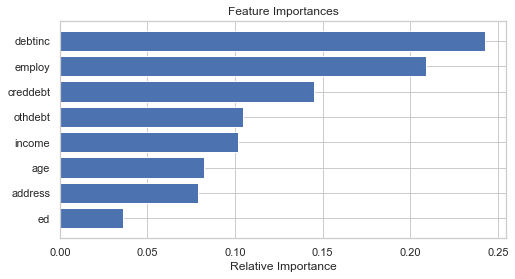

In [82]:
fig, ax = plt.subplots(figsize=(8,4))
features = train.columns
importances = best_rf_clf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [83]:
y_rf_probs = clf_rf.predict_proba(Xtest)

In [84]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(ytest, y_best_proba)

In [85]:
fpr_rf, tpr_rf, thresholds_rf = roc_curve(ytest, y_best_proba)

# Gradient Boosting Algorithm

In [86]:
from sklearn.ensemble import GradientBoostingClassifier

In [87]:
clf_xgb = GradientBoostingClassifier(n_estimators=200)

In [88]:
clf_xgb.fit(Xtrain, ytrain)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [89]:
y_predict_xgb = clf_xgb.predict(Xtest)

In [90]:
accuracy_score(ytest, y_predict_xgb)

0.7828571428571428

In [91]:
y_predict_xgb1 = clf_xgb.predict_proba(Xtest)[:, 1]

In [92]:
print(classification_report(ytest, y_predict_xgb))

              precision    recall  f1-score   support

           0       0.83      0.89      0.86       132
           1       0.58      0.44      0.50        43

    accuracy                           0.78       175
   macro avg       0.70      0.67      0.68       175
weighted avg       0.77      0.78      0.77       175



In [93]:
precision_xgb, recall_xgb, thresholds_xgb = precision_recall_curve(ytest, y_predict_xgb1)

In [94]:
fpr_xgb, tpr_xgb, thresholds_xgb = roc_curve(ytest, y_predict_xgb1)

In [95]:
#build confusion matrix

CM = pd.crosstab(ytest, y_predict_xgb)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(ytest, dt_pred)*100
print(((TP+TN)*100)/(TP+TN+FP+FN))

#False Negative rate 
print((FN*100)/(FN+TP))

print("Defaulted", sum(y_predict_xgb!=0))
print("Non-defaulted ", sum(y_predict_xgb==0))
CM

78.28571428571429
55.81395348837209
Defaulted 33
Non-defaulted  142


col_0,0,1
default,,
0,118,14
1,24,19


Text(0.5, 1.0, 'Precision vs. Recall curve')

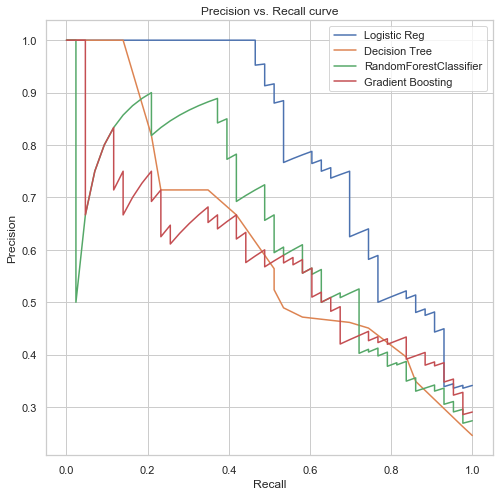

In [96]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(recall_lg, precision_lg)
plt.plot(recall_dc, precision_dc)
plt.plot(recall_rf, precision_rf)
plt.plot(recall_xgb, precision_xgb)
plt.legend(('Logistic Reg', 'Decision Tree', 'RandomForestClassifier', 'Gradient Boosting'))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs. Recall curve')

In [97]:
area_log_reg = auc(recall_lg, precision_lg)
print(area_log_reg)
area_dc = auc(recall_dc, precision_dc)
print(area_dc)
area_rf = auc(recall_rf, precision_rf)
print(area_rf)
area_xgb = auc(recall_xgb, precision_xgb)
print(area_xgb)

0.8003155219216889
0.6083448382291768
0.6274305252393284
0.576399288058108


Text(0.5, 1.0, 'ROC Curves')

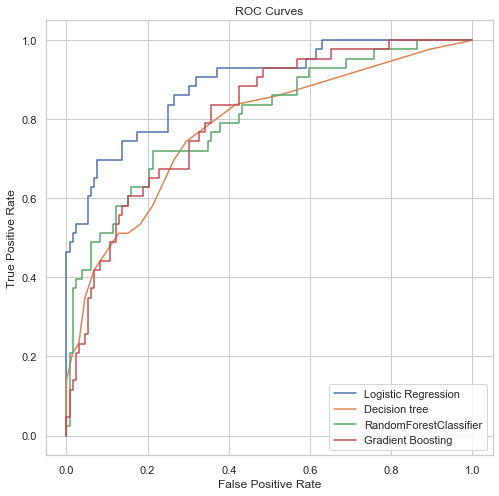

In [98]:
fig, ax = plt.subplots(figsize=(8,8))
plt.plot(fpr_lg, tpr_lg)
plt.plot(fpr_dc, tpr_dc)
plt.plot(fpr_rf, tpr_rf)
plt.plot(fpr_xgb, tpr_xgb)
plt.legend(('Logistic Regression' , 'Decision tree', 'RandomForestClassifier', 'Gradient Boosting'))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')

In [99]:
Areas_ROC_logistic  = roc_auc_score(ytest, p_clf_logis_ba[:, 1])
Areas_ROC_decision = roc_auc_score(ytest, dt_predict1)
Areas_ROC_randomforest = roc_auc_score(ytest, y_best_proba)
Areas_ROC_xgb = roc_auc_score(ytest, y_predict_xgb1)
print(Areas_ROC_logistic)
print(Areas_ROC_decision)
print(Areas_ROC_randomforest)
print(Areas_ROC_xgb)

0.8890063424947146
0.7791578576462297
0.8026779422128258
0.8076109936575053
